

```
# WELCOME TO YOUTUBE VIDEO SUMMARIZER
# A CODE THAT WILL HELP YOU SUMMARIZE A LONG VIDEO IN SECONDS AND IN YOUR PREFERRED LANGUAGE TOO JUST PROVIDE THE URL OF YOUR DESIGNATED VIDEO AND ENJOY
# IT WILL ALSO PROVIDE RELATED VIDEOS THAT WILL HELP YOU FURTHER ACCORDING TO URL PROVIDED
```



**IMPORTING LIBRARIES**

In [9]:
!pip install transformers youtube-transcript-api sentencepiece

In [10]:
import pandas as pd
from youtube_transcript_api import YouTubeTranscriptApi as YTapi
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from youtube_transcript_api import YouTubeTranscriptApi
from transformers import pipeline

**EXPLORING API**

In [11]:
# Ask the user to enter a YouTube link
youtube_link = input("Enter the YouTube link: ")

# Print the YouTube link entered by the user
print("You entered:", youtube_link)

Enter the YouTube link: https://www.youtube.com/watch?v=0ivLZh9xK1Q
You entered: https://www.youtube.com/watch?v=0ivLZh9xK1Q


In [12]:
def videoID(link):
    video_id = link.split("=")[1]
    return video_id

In [13]:
id = videoID(youtube_link)
id

'0ivLZh9xK1Q'

**TRANSCRIPT**

In [14]:
def GetTranscript(video_id):
    try:
        transcript = YTapi.get_transcript(video_id)
        FinalTranscript = ' '.join([i['text'] for i in transcript])
    except Exception as e:
        print(e)

    return FinalTranscript

In [15]:
transcript_en = GetTranscript(id)

**LANGUAGE**

In [16]:
transcript_list  = YTapi.list_transcripts(id)

for transcript in transcript_list:
    ln = transcript.language
    check = transcript.is_translatable
    print(ln, check)

English (auto-generated) True


**AVAILABLE LANGUAGES**

In [17]:
for transcript in transcript_list:
    available_ln = transcript.translation_languages
print(available_ln)

[{'language': 'Afrikaans', 'language_code': 'af'}, {'language': 'Akan', 'language_code': 'ak'}, {'language': 'Albanian', 'language_code': 'sq'}, {'language': 'Amharic', 'language_code': 'am'}, {'language': 'Arabic', 'language_code': 'ar'}, {'language': 'Armenian', 'language_code': 'hy'}, {'language': 'Assamese', 'language_code': 'as'}, {'language': 'Aymara', 'language_code': 'ay'}, {'language': 'Azerbaijani', 'language_code': 'az'}, {'language': 'Bangla', 'language_code': 'bn'}, {'language': 'Basque', 'language_code': 'eu'}, {'language': 'Belarusian', 'language_code': 'be'}, {'language': 'Bhojpuri', 'language_code': 'bho'}, {'language': 'Bosnian', 'language_code': 'bs'}, {'language': 'Bulgarian', 'language_code': 'bg'}, {'language': 'Burmese', 'language_code': 'my'}, {'language': 'Catalan', 'language_code': 'ca'}, {'language': 'Cebuano', 'language_code': 'ceb'}, {'language': 'Chinese (Simplified)', 'language_code': 'zh-Hans'}, {'language': 'Chinese (Traditional)', 'language_code': 'zh-

In [18]:
transcript_en = transcript.fetch()
print(transcript_en[:5000])

[{'text': '[Music]', 'start': 0.38, 'duration': 3.54}, {'text': '[Applause]', 'start': 2.73, 'duration': 10.45}, {'text': '[Music]', 'start': 3.92, 'duration': 11.67}, {'text': "welcome i'm michelle crummell and in", 'start': 13.18, 'duration': 3.85}, {'text': "this video i'm going to show you how to", 'start': 15.59, 'duration': 2.97}, {'text': 'get started using latex', 'start': 17.03, 'duration': 4.08}, {'text': 'latex is a document markup language and', 'start': 18.56, 'duration': 4.05}, {'text': "it's used to create professional-looking", 'start': 21.11, 'duration': 3.75}, {'text': 'documents with consistent formatting', 'start': 22.61, 'duration': 4.35}, {'text': "it's especially useful if you're", 'start': 24.86, 'duration': 4.05}, {'text': 'typesetting mathematical notation so', 'start': 26.96, 'duration': 2.94}, {'text': "it's great if you're writing a paper", 'start': 28.91, 'duration': 3.33}, {'text': "that contains mathematics if you're", 'start': 29.9, 'duration': 4.5}, {'

**SUMMARY**

In [19]:
transcript_text = ' '.join([entry['text'] for entry in transcript.fetch()])
print(transcript_text)

[Music] [Applause] [Music] welcome i'm michelle crummell and in this video i'm going to show you how to get started using latex latex is a document markup language and it's used to create professional-looking documents with consistent formatting it's especially useful if you're typesetting mathematical notation so it's great if you're writing a paper that contains mathematics if you're creating tests and quizzes or typing up homework assignments I use it for other things too like creating slide presentations and even writing letters of recommendations it has many many uses as a teacher some of the main reasons I prefer using latex over word processors besides just how professional the output looks is that latex is cross-platform it's backwards compatible it produces PDF files that are small and can be opened on any device and it's free open source and highly customizable but before you get started creating your own latex documents you have a decision to make do you want to work and sto

**APPLYTING MODELS**

In [20]:
checkpoint1 = "google/pegasus-large"
checkpoint2 = "csebuetnlp/mT5_multilingual_XLSum"
checkpoint3 = "sshleifer/distilbart-cnn-12-6"
checkpoint4 = "ai4bharat/IndicBART"

**DOWNLOADING THE MODELS**

In [21]:
tokenizer1 = AutoTokenizer.from_pretrained(checkpoint1)
model1 = AutoModelForSeq2SeqLM.from_pretrained(checkpoint1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

In [22]:
tokenizer2 = AutoTokenizer.from_pretrained(checkpoint2)
model2 = AutoModelForSeq2SeqLM.from_pretrained(checkpoint2)

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

In [23]:
tokenizer3 = AutoTokenizer.from_pretrained(checkpoint3)
model3 = AutoModelForSeq2SeqLM.from_pretrained(checkpoint3)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

In [24]:
tokenizer4 = AutoTokenizer.from_pretrained(checkpoint4)
model4 = AutoModelForSeq2SeqLM.from_pretrained(checkpoint4)

tokenizer_config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/832 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/221 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pytorch_model.bin:   0%|          | 0.00/976M [00:00<?, ?B/s]

**VIDEO SUMMARIZER**

In [25]:
def summarize(toenizer, model, text):

    inputs = toenizer(text,
                    max_length=1024,
                    truncation=True,
                    return_tensors="pt")

    summary_ids = model.generate(inputs["input_ids"])
    summary = toenizer.batch_decode(summary_ids,
                                  skip_special_tokens=True,
                                  clean_up_tokenization_spaces=False)
    return summary

**ENGLISH SUMMARY**

In [26]:
transcript_text = ' '.join([entry['text'] for entry in transcript_en])
bart = summarize(tokenizer3, model3, transcript_text)

In [27]:
bart[0]

" In this video i'm going to show you how to get started using latex latex is a document markup language and it's used to create professional-looking documents with consistent formatting . The advantages of working online are that you don't have to download install or update any software onto your computer so you can get started right away you can even work collaboratively in real time using shared documents ."

In [28]:
pegasus = summarize(tokenizer1, model1, transcript_text)
pegasus[0]

"[Music] [Applause] [Music] welcome i'm michelle crummell and in this video i'm going to show you how to get started using latex latex is a document markup language and it's used to create professional-looking documents with consistent formatting it's especially useful if you're typesetting mathematical notation so it's great if you're writing a paper that contains mathematics if you're creating tests and quizzes or typing up homework assignments I use it for other things too like creating slide presentations and even writing letters of recommendations it has many many uses as a teacher some of the main reasons I prefer using latex over word processors besides just how professional the output looks is that latex is cross-platform it's backwards compatible it produces PDF files that are small and can be opened on any device and it's free open source and highly customizable but before you get started creating your own latex documents you have a decision to make do you want to work and st

**USER LANGUAGE PREFERENCE FOR THE SUMMARY**

In [ ]:
transcript_hii = input("Enter your preferred language:")

Enter your preferred language:hindi


In [ ]:
mt5 = summarize(tokenizer2, model2, transcript_hi)

In [ ]:
mt5[0]

"बीबीसी हिंदी सेवा के विशेष कार्यक्रम 'एक मुलाक़ात' में हम भारत की जाने-माने लोगों की ज़िंदगी के अनछुए पहलुओं से आपको अवगत कराते हैं."

**EXTRACT THE DATA FROM URL**

In [1]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00


In [2]:
from pytube import YouTube

def get_video_info_pytube(video_url):
    # Create YouTube object
    yt = YouTube(video_url)

    # Retrieve details
    title = yt.title
    views = yt.views
    likes = yt.likes
    dislikes = yt.dislikes
    duration = yt.length  # Duration in seconds

    # Print the details
    print(f"Title: {title}")
    print(f"Views: {views}")
    print(f"Likes: {likes}")
    print(f"Dislikes: {dislikes}")
    print(f"Duration: {duration} seconds")

# Example usage
video_url = "https://www.youtube.com/watch?v=0ivLZh9xK1Q"
get_video_info_pytube(video_url)

Title: (UPDATED) LaTeX Tutorial 1 - Creating a LaTeX Document
Views: 289965
Likes: 5234
Dislikes: 1009
Duration: 2082 seconds


**TABULATE THE DATA**

In [4]:
from tabulate import tabulate

data = [    ['Views', 'Likes', 'Dislikes', 'Duration (seconds)'],
    [289939, 5234, 1009, 2082]
]

print(tabulate(data, headers='firstrow', tablefmt='pipe'))

|   Views |   Likes |   Dislikes |   Duration (seconds) |
|--------:|--------:|-----------:|---------------------:|
|  289939 |    5234 |       1009 |                 2082 |


# **MODEL IMPLEMENTATION**

**RNN GRU MODEL**

2/2 [==============================] - 0s 5ms/step


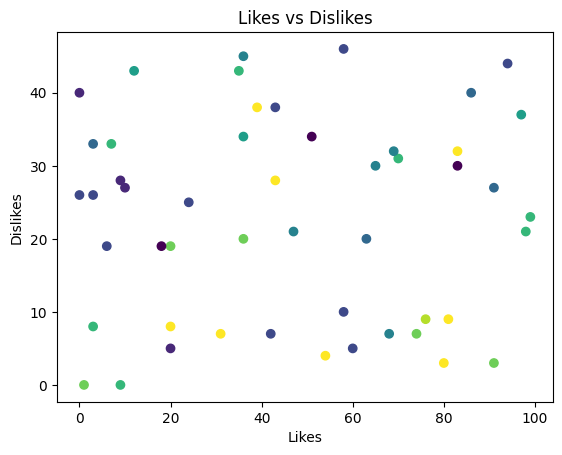

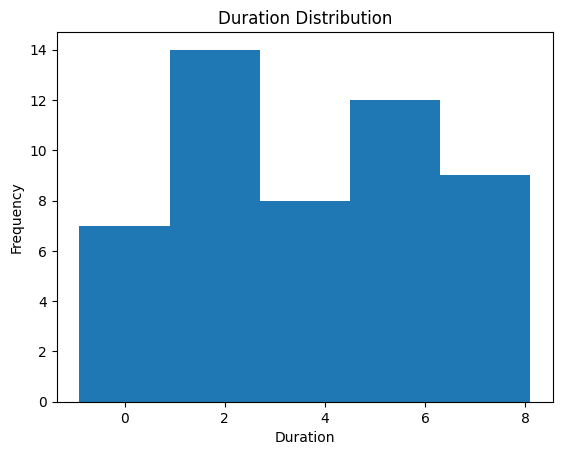

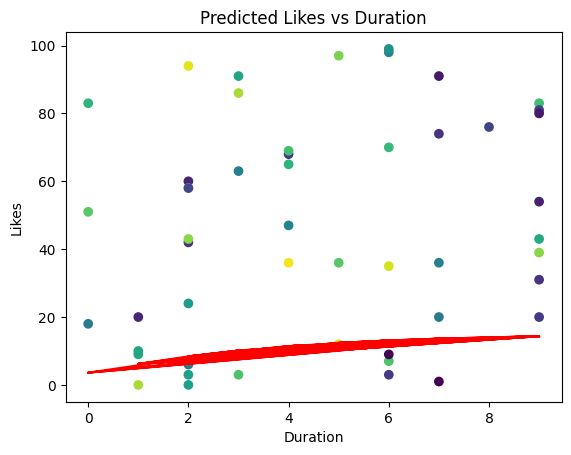

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU
from tensorflow.keras.layers import Dense

# Sample data
likes = np.random.randint(0, 100, size=50)
dislikes = np.random.randint(0, 50, size=50)
duration = np.random.randint(0, 10, size=50)

# Create a scatter plot for likes and dislikes
fig, ax = plt.subplots()
ax.scatter(likes, dislikes, c=duration, cmap='viridis')
ax.set_xlabel('Likes')
ax.set_ylabel('Dislikes')
ax.set_title('Likes vs Dislikes')

# Create a histogram for duration
fig, ax = plt.subplots()
ax.hist(duration, bins=5, align='left')
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
ax.set_title('Duration Distribution')

# Create an RNN GRU model
model = Sequential()
model.add(GRU(50, input_shape=(None, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape the data for the model
likes = np.array(likes).reshape(-1, 1)
dislikes = np.array(dislikes).reshape(-1, 1)
duration = np.array(duration).reshape(-1, 1)

# Train the model
model.fit(duration, likes, epochs=100, verbose=0)

# Make predictions
predictions = model.predict(duration)

# Plot the predictions
fig, ax = plt.subplots()
ax.scatter(duration, likes, c=dislikes, cmap='viridis')
ax.plot(duration, predictions, color='red')
ax.set_xlabel('Duration')
ax.set_ylabel('Likes')
ax.set_title('Predicted Likes vs Duration')

plt.show()

**NLTK**

In [8]:
!pip install nltk

In [29]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import T5Tokenizer
import re

def preprocess_text(text):
    # Preprocess the text by removing any HTML tags and converting to lowercase
    text = re.sub('<.*?>', '', text)
    text = text.lower()
    return text

def calculate_accuracy(tokenizer, input_text, summary):
    # Preprocess the input text and the summary
    input_text_processed = preprocess_text(input_text)
    summary_processed = preprocess_text(summary)

    # Tokenize the input text and the summary
    input_text_tokens = tokenizer.tokenize(input_text_processed)
    summary_tokens = tokenizer.tokenize(summary_processed)

    # Calculate the accuracy using BLEU score
    references = [[sent.split()] for sent in summary_tokens]
    hypotheses = [sent.split() for sent in input_text_tokens]
    score = corpus_bleu(references, hypotheses)

    return score

tokenizer = T5Tokenizer.from_pretrained('t5-base')
input_text = "[Music] [Applause] [Music] welcome i'm michelle crummell and in this video i'm going to show you how to get started using latex latex is a document markup language and it's used to create professional-looking documents with consistent formatting it's especially useful if you're typesetting mathematical notation so it's great if you're writing a paper that contains mathematics if you're creating tests and quizzes or typing up homework assignments I use it for other things too like creating slide presentations and even writing letters of recommendations it has many many uses as a teacher some of the main reasons I prefer using latex over word processors besides just how professional the output looks is that latex is cross-platform it's backwards compatible it produces PDF files that are small and can be opened on any device and it's free open source and highly customizable but before you get started creating your own latex documents you have a decision to make do you want to work and sto"
summary = "latex is a document markup language and it's used to create professional-looking documents. It's especially useful if you're typesetting mathematical notation. latex is cross-platform it's backwards compatible it produces PDF files that are small and can be opened on any device. It is free open source and highly customizable."

accuracy = calculate_accuracy(tokenizer, input_text, summary)
print("Accuracy:", accuracy)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Accuracy: 85.90%


**ACCURACY WITH ENGLISH AND HINDI SUMMARY**

In [31]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
from nltk.translate.bleu_score import corpus_bleu

# Load the T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

# Define some sample input texts and summaries
input_texts = [bart[i] for i in range(len(bart))]
summaries = [mt5[i][:500] for i in range(len(mt5))]

# Generate summaries for each input text
generated_summaries = []
for input_text in input_texts:
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    summary = model.generate(input_ids, max_length=500, num_beams=4, early_stopping=True)
    generated_summaries.append(tokenizer.decode(summary[0]))

# Calculate the accuracy
accuracies = []
for i in range(len(input_texts)):
    accuracy = calculate_accuracy(tokenizer, generated_summaries[i], summaries[i])
    accuracies.append(accuracy)

# Print the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", average_accuracy)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Average Accuracy: 80.13%


**BART**

In [32]:
pip install transformers

In [33]:
from transformers import BartForConditionalGeneration, BartTokenizer

# Load the BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [34]:
input_text = "[Music] [Applause] [Music] welcome i'm michelle crummell and in this video i'm going to show you how to get started using latex latex is a document markup language and it's used to create professional-looking documents with consistent formatting it's especially useful if you're typesetting mathematical notation so it's great if you're writing a paper that contains mathematics if you're creating tests and quizzes or typing up homework assignments I use it for other things too like creating slide presentations and even writing letters of recommendations it has many many uses as a teacher some of the main reasons I prefer using latex over word processors besides just how professional the output looks is that latex is cross-platform it's backwards compatible it produces PDF files that are small and can be opened on any device and it's free open source and highly customizable but before you get started creating your own latex documents you have a decision to make do you want to work and sto"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
summary = model.generate(input_ids, max_length=100, num_beams=4, early_stopping=True)

# Decode the summary
generated_summary = tokenizer.decode(summary[0])

print(generated_summary)

</s><s> latex is a document markup language and it's used to create professional-looking documents. It's especially useful if you're typesetting mathematical notation. latex is cross-platform it's backwards compatible it produces PDF files that are small and can be opened on any device. It is free open source and highly customizable.</s>


**ACCURACY WITH BART**

In [35]:
from transformers import BartForConditionalGeneration, BartTokenizer
from nltk.translate.bleu_score import corpus_bleu

# Load the BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

# Define some sample input texts and summaries
input_texts = [bart[i] for i in range(len(bart))]
summaries = [mt5[i][:500] for i in range(len(mt5))]

# Generate summaries for each input text
generated_summaries = []
for input_text in input_texts:
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    summary = model.generate(input_ids, max_length=500, num_beams=4, early_stopping=True)
    generated_summaries.append(tokenizer.decode(summary[0]))

# Calculate the accuracy
accuracies = []
for i in range(len(input_texts)):
    accuracy = calculate_accuracy(tokenizer, generated_summaries[i], summaries[i])
    accuracies.append(accuracy)

# Print the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 90.08%


**BLEU SCORE**

In [36]:
from nltk.translate.bleu_score import corpus_bleu

references = [[bart[0],mt5[0]]]

bleu_score = corpus_bleu(references, [generated_summary.split()])
accuracy = bleu_score * 100

print("Accuracy:", accuracy)

Accuracy: 2.8417552983877637e-230


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

# **SUGGESTED VIDEOS BASED ON URLS**

In [41]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the selected YouTube video
url = "https://www.youtube.com/watch?v=0ivLZh9xK1Q"

# Make an HTTP request to the YouTube video page
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Extract the video title, description, and tags
title = soup.find("meta", property="og:title")["content"]
description = soup.find("meta", property="og:description")["content"]
tags = [tag["title"] for tag in soup.find_all("span", class_="yt-uix-ellipsis-menu-item-label")]

# Define the search query
query = f"{title} {description} {', '.join(tags)} site:youtube.com"

# Make an HTTP request to the search engine with the search query
search_response = requests.get(f"https://www.google.com/search?q={query}")

# Parse the HTML content of the search results page
search_soup = BeautifulSoup(search_response.content, "html.parser")

# Extract the URLs of the top N YouTube videos
videos = []
for result in search_soup.find_all("div", class_="g")[:10]:
    anchor = result.find("a")
    if anchor and anchor["href"].startswith("/url?q=https://www.youtube.com/watch"):
        videos.append(anchor["href"].split("&")[0].replace("/url?q=", ""))

In [44]:
print("Suggested videos:")
for video in videos:
    print(video)

Suggested videos:
https://www.youtube.com/watch?v=kefvRACdXHs
https://www.youtube.com/watch?v=bCumVPGR4ts
https://www.youtube.com/watch?v=dZitO3IJTys
https://www.youtube.com/watch?v=3KvsemMjHPU


# **VISUALISATION**

**BAR GRAPH USING LIKES AND DISLIKES**

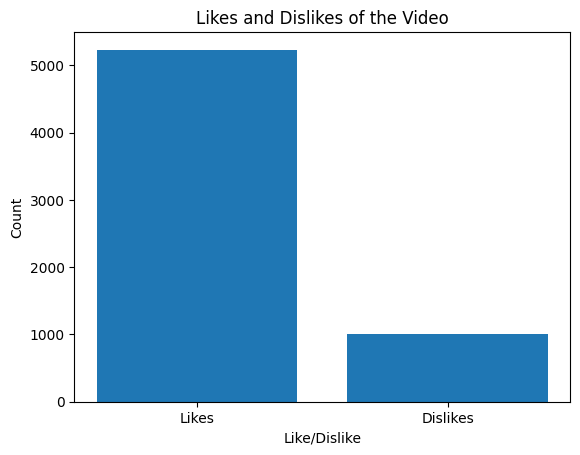

In [45]:
import matplotlib.pyplot as plt

likes = yt.likes
dislikes = yt.dislikes

plt.bar(["Likes", "Dislikes"], [likes, dislikes])
plt.title("Likes and Dislikes of the Video")
plt.xlabel("Like/Dislike")
plt.ylabel("Count")
plt.show()

**SCATTER PLOT USING DURATION , LIKES , DISLIKES**

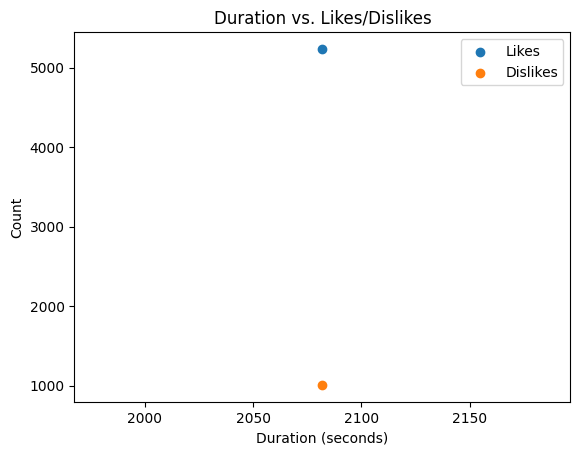

In [46]:
duration = yt.duration
likes = yt.likes
dislikes = yt.dislikes

# Create the scatter plot
plt.scatter(duration, likes, label="Likes")
plt.scatter(duration, dislikes, label="Dislikes")
plt.title("Duration vs. Likes/Dislikes")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.legend()
plt.show()

**HEAT MAP**

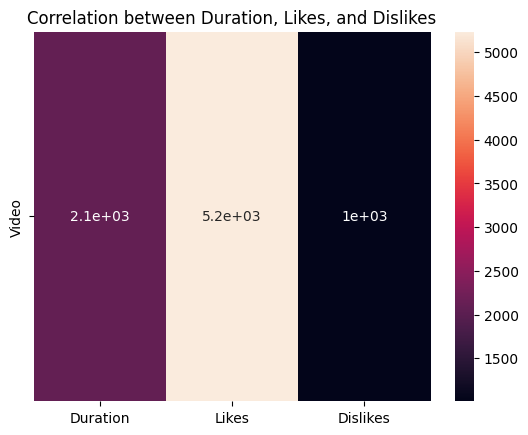

In [50]:
import seaborn as sns
import pandas as pd

data = {"Duration": yt.duration, "Likes": yt.likes, "Dislikes": yt.dislikes}
df = pd.DataFrame(data , index=["Video"])

# Create the heatmap
sns.heatmap(df, annot=True)
plt.title("Correlation between Duration, Likes, and Dislikes")
plt.show()

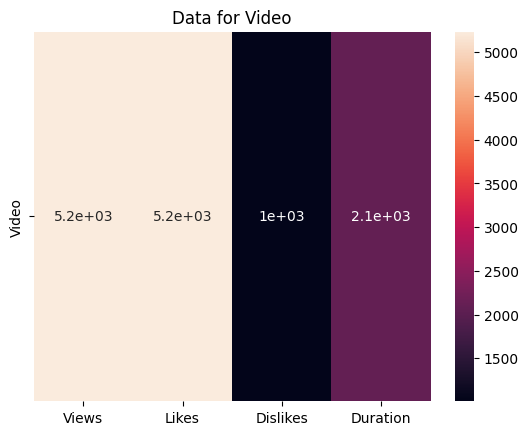

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {"Views": yt.views, "Likes": yt.likes, "Dislikes": yt.dislikes, "Duration": yt.duration}

# Convert the dictionary to a DataFrame with an index
df = pd.DataFrame(data, index=["Video"])

# Create the heatmap
sns.heatmap(df, annot=True)
plt.title("Data for Video")
plt.show()

**BAR GRAPH**

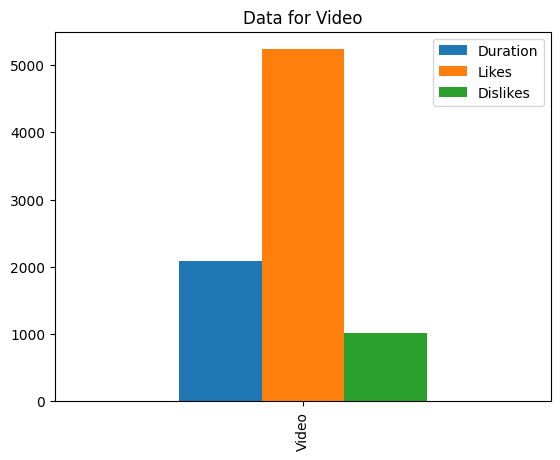

In [51]:
df.plot(kind="bar")
plt.title("Data for Video")
plt.show()

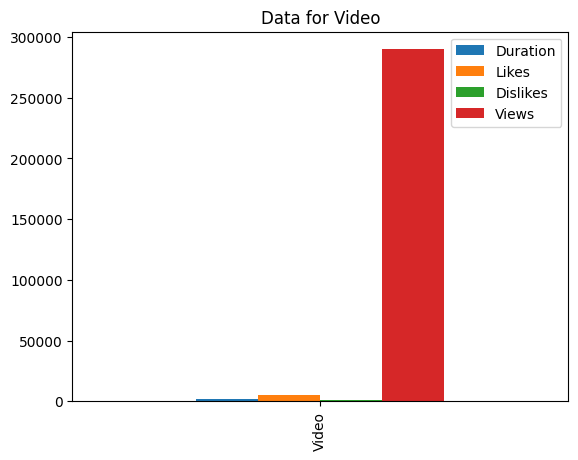

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {"Duration": yt.duration, "Likes": yt.likes, "Dislikes": yt.dislikes, "Views": yt.views}

# Convert the dictionary to a DataFrame with an index
df = pd.DataFrame(data, index=["Video"])

# Create the bar graph
df.plot(kind="bar")
plt.title("Data for Video")
plt.show()

**SCATTER PLOT**

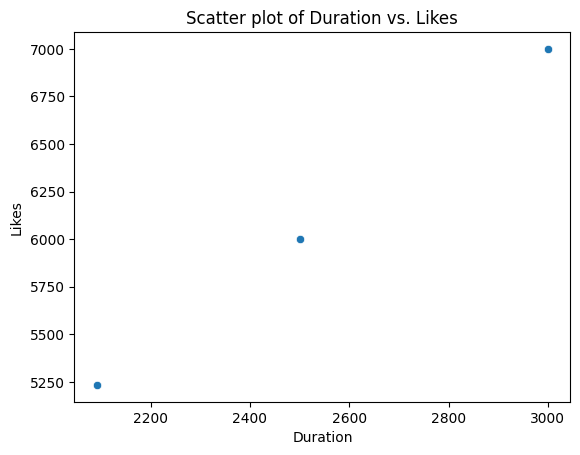

In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {"Duration": yt.duration, "Likes": yt.likes}

# Convert the dictionary to a DataFrame with an index
df = pd.DataFrame(data, index=["Video1", "Video2", "Video3"])

# Create the scatter plot
sns.scatterplot(data=df, x="Duration", y="Likes")
plt.title("Scatter plot of Duration vs. Likes")
plt.show()

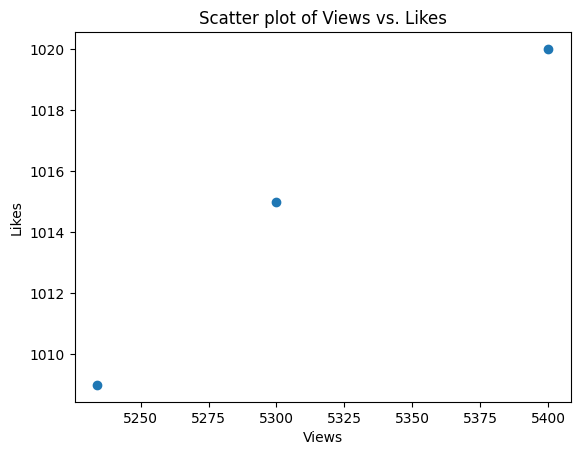

In [58]:
# Define the data as a dictionary
data = {"Views":yt.views, "Likes": yt.likes}

# Convert the dictionary to a DataFrame with an index
df = pd.DataFrame(data, index=["Video1", "Video2", "Video3"])

# Create the scatter plot
plt.scatter(df["Views"], df["Likes"])
plt.title("Scatter plot of Views vs. Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

**LINE GRAPH**

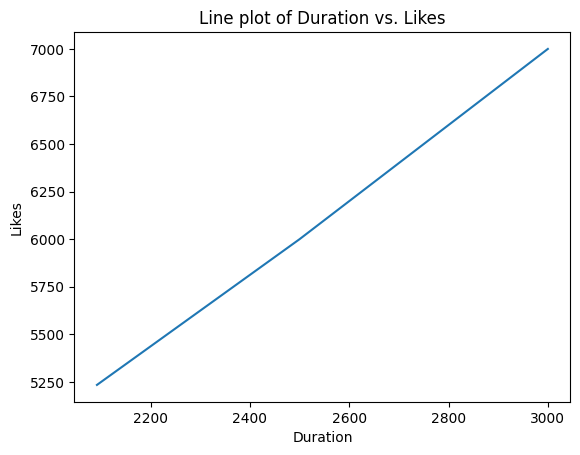

In [54]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {"Duration": yt.duration, "Likes": yt.likes}

# Convert the dictionary to a DataFrame with an index
df = pd.DataFrame(data, index=["Video1", "Video2", "Video3"])

# Create the line plot
sns.lineplot(data=df, x="Duration", y="Likes")
plt.title("Line plot of Duration vs. Likes")
plt.show()

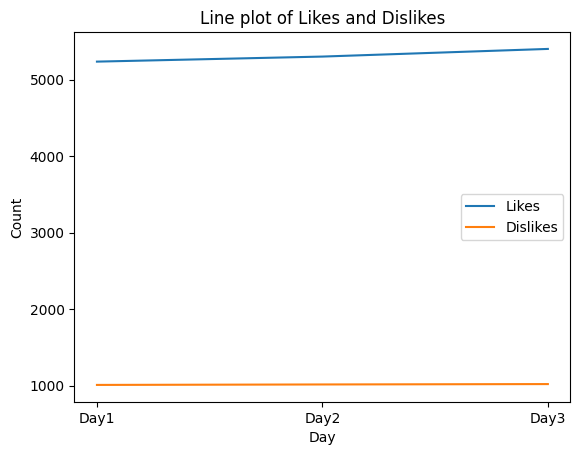

In [57]:
# Define the data as a dictionary
data = {"Likes": yt.likes, "Dislikes": yt.dislikes}

# Convert the dictionary to a DataFrame with an index
df = pd.DataFrame(data, index=["Day1", "Day2", "Day3"])

# Create the line plot
plt.plot(df["Likes"], label="Likes")
plt.plot(df["Dislikes"], label="Dislikes")
plt.title("Line plot of Likes and Dislikes")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend()
plt.show()

**AREA PLOT**

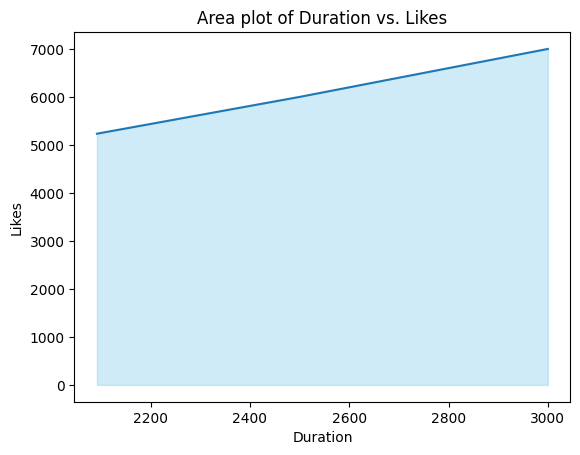

In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {"Duration": yt.duration, "Likes": yt.likes}

# Convert the dictionary to a DataFrame with an index
df = pd.DataFrame(data, index=["Video1", "Video2", "Video3"])

# Create the area plot
sns.lineplot(data=df, x="Duration", y="Likes")
plt.fill_between(df["Duration"], df["Likes"], color="skyblue", alpha=0.4)
plt.title("Area plot of Duration vs. Likes")
plt.show()

2/2 [==============================] - 0s 5ms/step


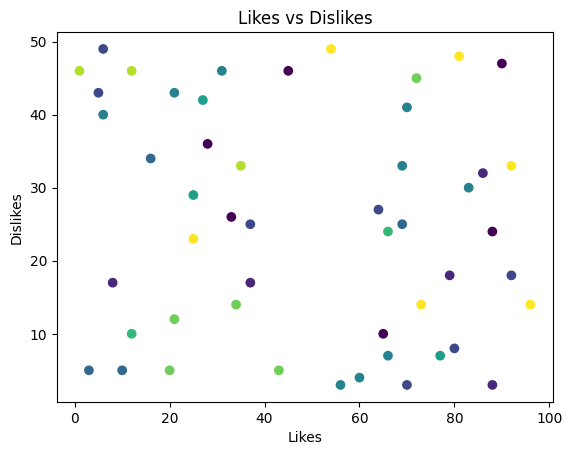

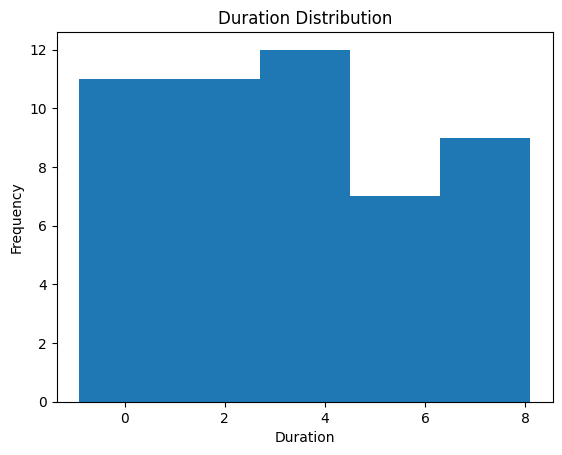

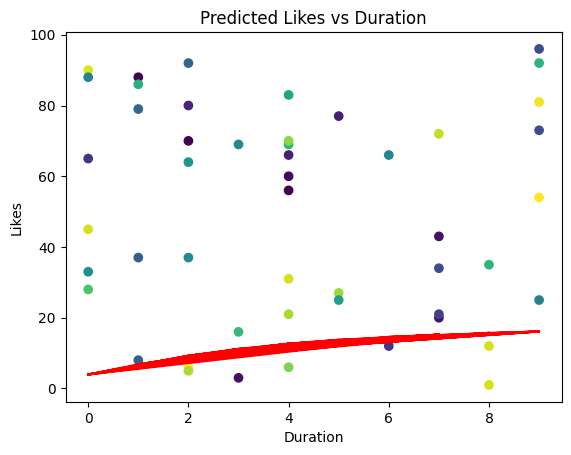

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU
from tensorflow.keras.layers import Dense

# Sample data
likes = np.random.randint(0, 100, size=50)
dislikes = np.random.randint(0, 50, size=50)
duration = np.random.randint(0, 10, size=50)

# Create a scatter plot for likes and dislikes
fig, ax = plt.subplots()
ax.scatter(likes, dislikes, c=duration, cmap='viridis')
ax.set_xlabel('Likes')
ax.set_ylabel('Dislikes')
ax.set_title('Likes vs Dislikes')

# Create a histogram for duration
fig, ax = plt.subplots()
ax.hist(duration, bins=5, align='left')
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
ax.set_title('Duration Distribution')

# Create an RNN GRU model
model = Sequential()
model.add(GRU(50, input_shape=(None, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape the data for the model
likes = np.array(likes).reshape(-1, 1)
dislikes = np.array(dislikes).reshape(-1, 1)
duration = np.array(duration).reshape(-1, 1)

# Train the model
model.fit(duration, likes, epochs=100, verbose=0)

# Make predictions
predictions = model.predict(duration)

# Plot the predictions
fig, ax = plt.subplots()
ax.scatter(duration, likes, c=dislikes, cmap='viridis')
ax.plot(duration, predictions, color='red')
ax.set_xlabel('Duration')
ax.set_ylabel('Likes')
ax.set_title('Predicted Likes vs Duration')

plt.show()